In [10]:
import pandas as pd
from math import pi, exp
from numpy import exp, sqrt
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
import numpy as np
import seaborn as sns
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

In [2]:
columns = ['asia','tub','smoke','lung','bronc','either','xray','dysp']
features = ["has_visited_asia", "has_tuberculosis", "smoking", "has_lung_cancer", "has_bronchitis", "either_tuberculosis_or_cancer", "xray_result", "dyspnea"]
data = pd.read_csv("data/ASIA10k.csv", names=features, header=1)

In [17]:
data = pd.read_csv("data/iris.data", header=0)
data.rename(index=str, columns={
    'sepal_length_in_cm':'1_sepal_length',
    'sepal_width_in_cm':'2_sepal_width', 
    'petal_length_in_cm':'3_petal_length', 
    'petal_width_in_cm':'4_petal_width'
},inplace=True)

In [22]:
data.head()

,1_sepal_length,2_sepal_width,3_petal_length,4_petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
def gaussian_distribution(x, mean, std):
    return (1/(sqrt(2*pi)))*exp(-(x-mean)**2/(2*std**2)) 

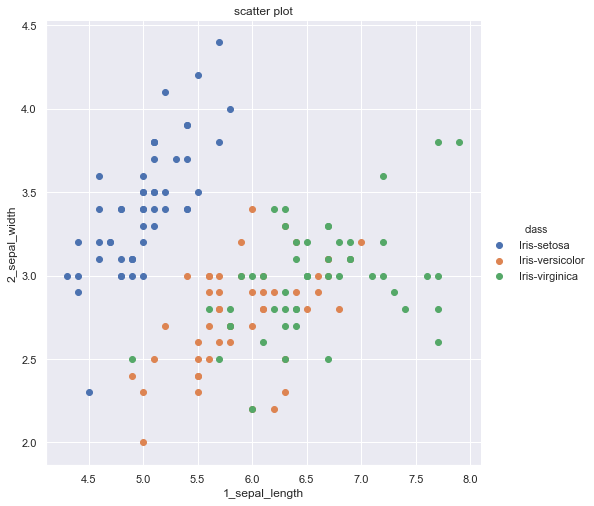

In [28]:
sns.FacetGrid(data, hue="class", size=7).map(plt.scatter, "1_sepal_length", "2_sepal_width").add_legend( )
plt.title("scatter plot")
df1 = data[["1_sepal_length", "2_sepal_width", "class"]]

In [105]:
pd.merge(df1, (df1.iloc[:,2].value_counts()/len(df1)).to_frame().reset_index().rename(columns={"index":"class", "class":"count"}), on="class")

,1_sepal_length,2_sepal_width,class,count
0,5.1,3.5,Iris-setosa,0.333333
1,4.9,3.0,Iris-setosa,0.333333
2,4.7,3.2,Iris-setosa,0.333333
3,4.6,3.1,Iris-setosa,0.333333
4,5.0,3.6,Iris-setosa,0.333333
5,5.4,3.9,Iris-setosa,0.333333
6,4.6,3.4,Iris-setosa,0.333333
7,5.0,3.4,Iris-setosa,0.333333
8,4.4,2.9,Iris-setosa,0.333333
9,4.9,3.1,Iris-setosa,0.333333


In [120]:
data.groupby("class").mean().loc["Iris-setosa"]

1_sepal_length    5.006
2_sepal_width     3.418
3_petal_length    1.464
4_petal_width     0.244
Name: Iris-setosa, dtype: float64

In [ ]:
# since we have 2 features only, therefore we are splitting the values into 3 groups
mu_list = np.split(df1.groupby("class").mean().values, [1,2])


std = data.groupby("class")["petal_width_in_cm"].std().reset_index(name="petal_width_in_cm_std")
data = pd.merge(data, std, left_on="class", right_on="class")

In [39]:
help(np.argmax)

Help on function argmax in module numpy:

argmax(a, axis=None, out=None)
    Returns the indices of the maximum values along an axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    
    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as `a.shape`
        with the dimension along `axis` removed.
    
    See Also
    --------
    ndarray.argmax, argmin
    amax : The maximum value along a given axis.
    unravel_index : Convert a flat index into an index tuple.
    
    Notes
    -----
    In case of multiple occurrences of the maximum values, the indices
    corresponding to the first occurrence are returned.
    


In [85]:
mean = data.groupby("class")["petal_width_in_cm"].mean().reset_index(name="petal_width_in_cm_mean")
data = pd.merge(data, mean, left_on="class", right_on="class")

In [86]:
data["petal_width_in_cm|class"]=norm.pdf(data["petal_width_in_cm"], loc=data["petal_width_in_cm_mean"], scale=data["petal_width_in_cm_std"])
data.drop(["petal_width_in_cm_mean", "petal_width_in_cm_std"], axis=1, inplace=True)

In [87]:
data["petal_width_in_cm|class"].std()

1.0299326810758798

In [88]:
data["petal_width_in_cm|class"].hist()

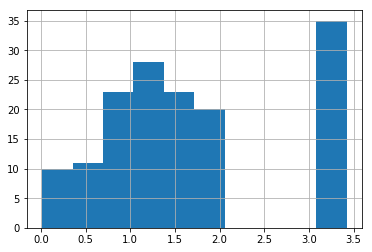

In [89]:
plt.show()

In [201]:
std = data.groupby("class")["petal_length_in_cm"].std().reset_index(name="petal_length_in_cm_std")
data = pd.merge(data, std, left_on="class", right_on="class")
mean = data.groupby("class")["petal_length_in_cm"].mean().reset_index(name="petal_length_in_cm_mean")
data = pd.merge(data, mean, left_on="class", right_on="class")

In [202]:
data["petal_length_in_cm|class"]=gaussian_distribution(data["petal_length_in_cm"], data["petal_length_in_cm_mean"], data["petal_length_in_cm_std"])
data.drop(["petal_length_in_cm_mean", "petal_length_in_cm_std"], axis=1, inplace=True)

In [203]:
std = data.groupby("class")["sepal_width_in_cm"].std().reset_index(name="sepal_width_in_cm_std")
data = pd.merge(data, std, left_on="class", right_on="class")
mean = data.groupby("class")["sepal_width_in_cm"].mean().reset_index(name="sepal_width_in_cm_mean")
data = pd.merge(data, mean, left_on="class", right_on="class")

In [204]:
data["sepal_width_in_cm|class"]=gaussian_distribution(data["sepal_width_in_cm"], data["sepal_width_in_cm_mean"], data["sepal_width_in_cm_std"])
data.drop(["sepal_width_in_cm_mean", "sepal_width_in_cm_std"], axis=1, inplace=True)

In [205]:
std = data.groupby("class")["sepal_length_in_cm"].std().reset_index(name="sepal_length_in_cm_std")
data = pd.merge(data, std, left_on="class", right_on="class")
mean = data.groupby("class")["sepal_length_in_cm"].mean().reset_index(name="sepal_length_in_cm_mean")
data = pd.merge(data, mean, left_on="class", right_on="class")

In [206]:
data["sepal_length_in_cm|class"]=gaussian_distribution(data["sepal_length_in_cm"], data["sepal_length_in_cm_mean"], data["sepal_length_in_cm_std"])
data.drop(["sepal_length_in_cm_mean", "sepal_length_in_cm_std"], axis=1, inplace=True)

In [207]:
data["sepal_length_in_cm|class"]*data["sepal_width_in_cm|class"]*data["petal_length_in_cm|class"]*data["petal_width_in_cm|class"]

0      0.020513
1      0.011391
2      0.008676
3      0.008287
4      0.019405
         ...   
145    0.012332
146    0.004237
147    0.020314
148    0.005144
149    0.007167
Length: 150, dtype: float64

In [193]:
norm.pdf(data[data["class"] == "Iris-setosa"]["petal_width_in_cm|class"], 
         loc=data[data["class"] == "Iris-setosa"]["petal_width_in_cm|class"].mean(),
        scale=data[data["class"] == "Iris-setosa"]["petal_width_in_cm|class"].std())

array([0.31007241, 0.31007241, 0.31007241, 0.31007241, 0.31007241,
       0.14513573, 0.3417365 , 0.31007241, 0.31007241, 0.19083702,
       0.31007241, 0.31007241, 0.19083702, 0.19083702, 0.31007241,
       0.14513573, 0.14513573, 0.3417365 , 0.3417365 , 0.3417365 ,
       0.31007241, 0.14513573, 0.31007241, 0.01968624, 0.31007241,
       0.31007241, 0.14513573, 0.31007241, 0.31007241, 0.31007241,
       0.31007241, 0.14513573, 0.19083702, 0.31007241, 0.19083702,
       0.31007241, 0.31007241, 0.19083702, 0.31007241, 0.31007241,
       0.3417365 , 0.3417365 , 0.31007241, 0.01204934, 0.14513573,
       0.3417365 , 0.31007241, 0.31007241, 0.31007241, 0.31007241])